In [ ]:
# to run, first make sure you have the required packages:
# pip install requests pandas, matplotlib, seaborn, numpy

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
instance_id = "max_sc_qbf-n_200-k_5"
inst12 = [{"exp": 1, "its":[0,1,19,79], "vals": [4575.48,4635.80,4650.52,4651.46]},
        {"exp": 2, "its":[0,1,5,18,29,32], "vals": [4544.19,4621.07,4634.47,4635.80,4644.21,4650.97]},
        {"exp": 3, "its":[0,1,15,62], "vals": [4631.64,4644.89,4650.97,4651.46]},
        {"exp": 4, "its":[0,2,3,4,6,11,13,376,384,403], "vals": [4574,4598,4606,4623,4635,4640,4644,4645,4650,4651]},
        {"exp": 5, "its":[0,1,19,79], "vals": [4575.48,4635.80,4650.52,4651.46]}
]


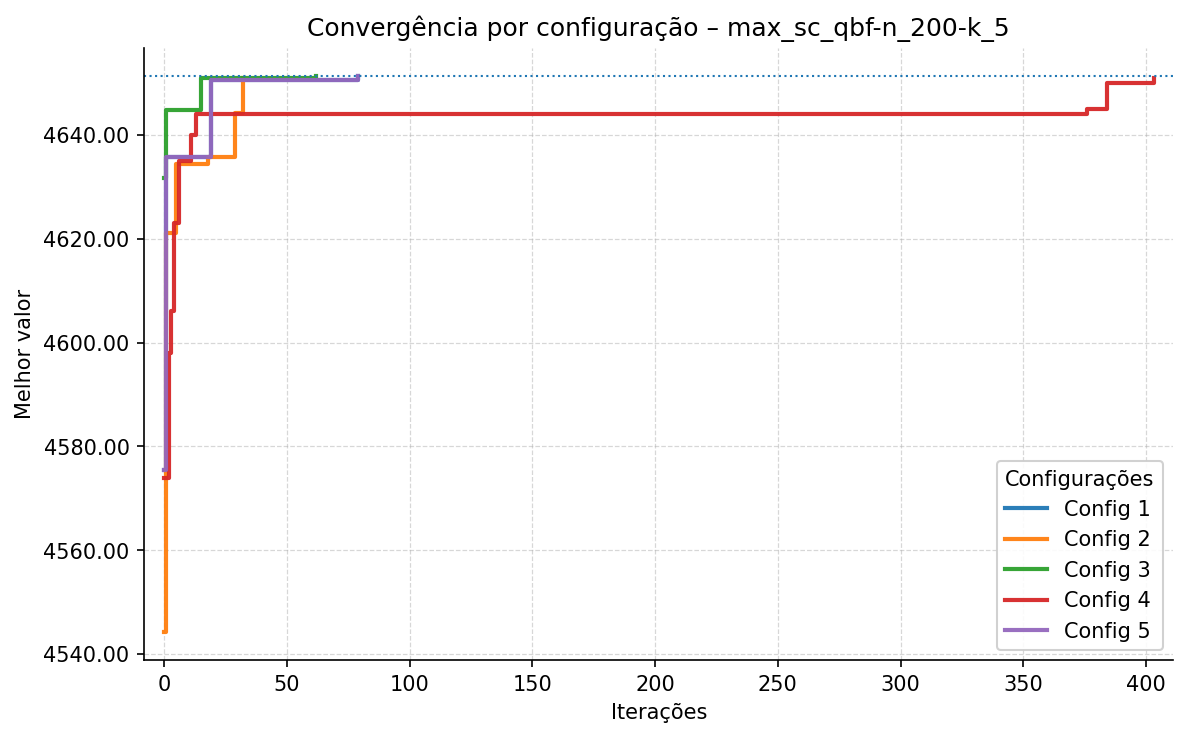

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

def step_curve(its, vals):
    """
    Constrói uma curva em degrau (best-so-far) adequada para plt.step(where='post').
    Garante ordenação por iteração e remove duplicatas.
    Retorna (x, y).
    """
    its = np.asarray(its, dtype=int)
    vals = np.asarray(vals, dtype=float)

    order = np.argsort(its)
    its_sorted = its[order]
    vals_sorted = vals[order]

    uniq_x, idx = np.unique(its_sorted, return_index=True)
    uniq_y = vals_sorted[idx]

    x = np.repeat(uniq_x, 2)[1:]
    y = np.repeat(uniq_y, 2)[:-1]
    x = np.insert(x, 0, uniq_x[0])
    y = np.insert(y, 0, uniq_y[0])
    return x, y


instance_id = globals().get("instance_id", "max_sc_qbf-n_200-k_5")

fig = plt.figure(figsize=(8, 5), dpi=150)
ax = plt.gca()

for r in inst12:
    x, y = step_curve(r["its"], r["vals"])
    plt.step(x, y, where='post', label=f"Config {r['exp']}", linewidth=2, alpha=0.95)

best_global = max(r["vals"][-1] for r in inst12)
ax.axhline(best_global, linestyle=':', linewidth=1)

ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.margins(x=0.02, y=0.05)

plt.xlabel("Iterações")
plt.ylabel("Melhor valor")
plt.title(f"Convergência por configuração – {instance_id}")

leg = plt.legend(title="Configurações", loc="lower right", frameon=True, framealpha=0.9, fancybox=True)
try:
    leg._legend_box.align = "left"
except Exception:
    pass

plt.tight_layout(pad=1.0)
plt.show()
